In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
dataset=pd.read_csv('annotated_points_np_200.csv')
dataset

,x,y,labels
0,1.512097,3.587662,1.0
1,4.415323,6.428571,1.0
2,2.782258,6.590909,1.0
3,1.875000,8.376623,1.0
4,2.963710,10.730519,1.0
...,...,...,...
195,24.616935,19.821429,2.0
196,22.681452,20.957792,2.0
197,23.951613,18.928571,2.0
198,25.705645,18.198052,2.0


In [17]:
dataset.labels[dataset.labels==2]=-1

/tmp/ipykernel_21013/4293624087.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset.labels[dataset.labels==2]=-1


In [18]:
dataset

,x,y,labels
0,1.512097,3.587662,1.0
1,4.415323,6.428571,1.0
2,2.782258,6.590909,1.0
3,1.875000,8.376623,1.0
4,2.963710,10.730519,1.0
...,...,...,...
195,24.616935,19.821429,-1.0
196,22.681452,20.957792,-1.0
197,23.951613,18.928571,-1.0
198,25.705645,18.198052,-1.0


In [19]:
x = np.array(dataset['x'])
y = np.array(dataset['y'])
labels = np.array(dataset['labels'])



In [20]:
x.shape

(200,)

In [21]:
test_train = np.c_[x, y]
print(len(test_train))

200


In [22]:
# y_train

In [23]:
# x_train.shape[1]

In [24]:
# w = np.zeros(x_train.shape[1])
# w

In [25]:
# max_iter=1000

In [26]:
def perceptron_train(x, y, labels, max_iter=400):
    x_train = np.c_[x, y]
    
    # Initialize weights
    w = np.zeros(x_train.shape[1])
    bias=0
    
    for t in range(max_iter):
        misclassified = False
        
        for i in range(len(x_train)):
            if labels[i] * (np.dot(w, x_train[i])+bias) <= 0:
                w = w + labels[i] * x_train[i]
                bias=bias+labels[i]
                misclassified = True
                print(w)
        
        if not misclassified:
            return w, bias
    
    return w, bias

    

Extra

In [27]:
x_train = np.array(dataset['x'])
y_train = np.array(dataset['y'])
labels = np.array(dataset['labels'])


weights, bias = perceptron_train(x_train, y_train, labels)
print("Learned weights:", weights)
print("Learned bias:", bias)

[1.51209677 3.58766234]
[-18.08467742 -24.02597403]
[-16.57258065 -20.43831169]
[-12.15725806 -14.00974026]
[-9.375      -7.41883117]
[-7.5         0.95779221]
[-4.53629032 11.68831169]
[ 5.74596774 14.38311688]
[-13.85080645 -13.23051948]
[-12.33870968  -9.64285714]
[-7.9233871  -3.21428571]
[-5.14112903  3.37662338]
[ 3.87096774 14.59415584]
[-15.72580645 -13.01948052]
[-14.21370968  -9.43181818]
[-9.7983871  -3.00324675]
[-7.01612903  3.58766234]
[ 0.66532258 14.88636364]
[-18.93145161 -12.72727273]
[-17.41935484  -9.13961039]
[-13.00403226  -2.71103896]
[-10.22177419   3.87987013]
[-2.96370968 15.90909091]
[-22.56048387 -11.70454545]
[-21.0483871   -8.11688312]
[-16.63306452  -1.68831169]
[-13.85080645   4.9025974 ]
[-6.59274194 16.93181818]
[ 3.68951613 19.62662338]
[-15.90725806  -7.98701299]
[-14.39516129  -4.39935065]
[-9.97983871  2.02922078]
[-4.77822581 14.46428571]
[ 7.9233871  16.83441558]
[-11.6733871  -10.77922078]
[-10.16129032  -7.19155844]
[-5.74596774 -0.76298701]
[-

Extra

In [28]:
def plot_separation_line(x, y, labels, weights, bias):
    plt.scatter(x, y, c=labels, cmap=plt.cm.Paired, marker='o', edgecolors='k')
    
    # Plot the separation line
    x_values = np.linspace(min(x), max(x), 100)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    
    plt.plot(x_values, y_values, color='black', linestyle='-', linewidth=2)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron Learning Algorithm')
    plt.show()


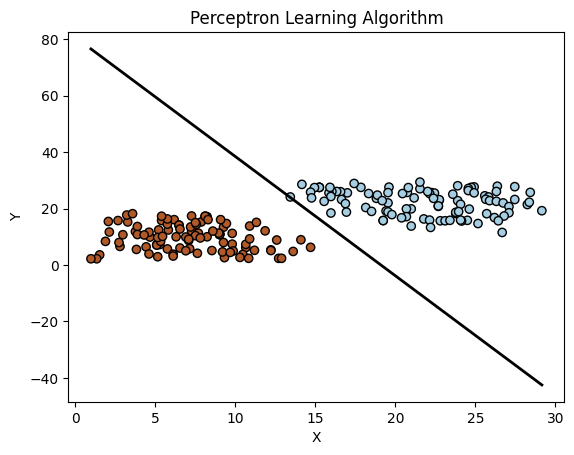

In [29]:
plot_separation_line(x_train, y_train, labels, weights, bias)